In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [2]:
plt.rcParams['figure.figsize'] = (14, 8)
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

In [3]:
sys.path.append(os.path.abspath("../.."))


In [7]:
from analysis.preprocessing import load_and_clean_acid_data, load_and_clean_CO2_emission_data

# Charger les données d'acidification
df_acid = load_and_clean_acid_data()
df_acid = df_acid[["year", "Ocean_acidification(in_PH)"]]
df_acid = df_acid.dropna()
df_co2 = load_and_clean_CO2_emission_data()



In [8]:
co2_mondial_annuel = df_co2.groupby('Year')['emissions_total'].sum().reset_index()
co2_mondial_annuel = co2_mondial_annuel.rename(columns={'Year': 'year'})

# Fusion des deux datasets sur les années communes
merged_co2_acid = df_acid.merge(co2_mondial_annuel, on='year', how='inner')

print(f"Données fusionnées CO2-Acidification:")
print(f"Période commune: {merged_co2_acid['year'].min()} - {merged_co2_acid['year'].max()}")
print(f"Nombre d'années analysées: {len(merged_co2_acid)}")
print(merged_co2_acid.head())


Données fusionnées CO2-Acidification:
Période commune: 1950.0 - 2022.0
Nombre d'années analysées: 73
     year  Ocean_acidification(in_PH)  emissions_total
0  1950.0                        8.15     4.028691e+10
1  1951.0                        8.15     4.343623e+10
2  1952.0                        8.15     4.412532e+10
3  1953.0                        8.15     4.538909e+10
4  1954.0                        8.15     4.660781e+10


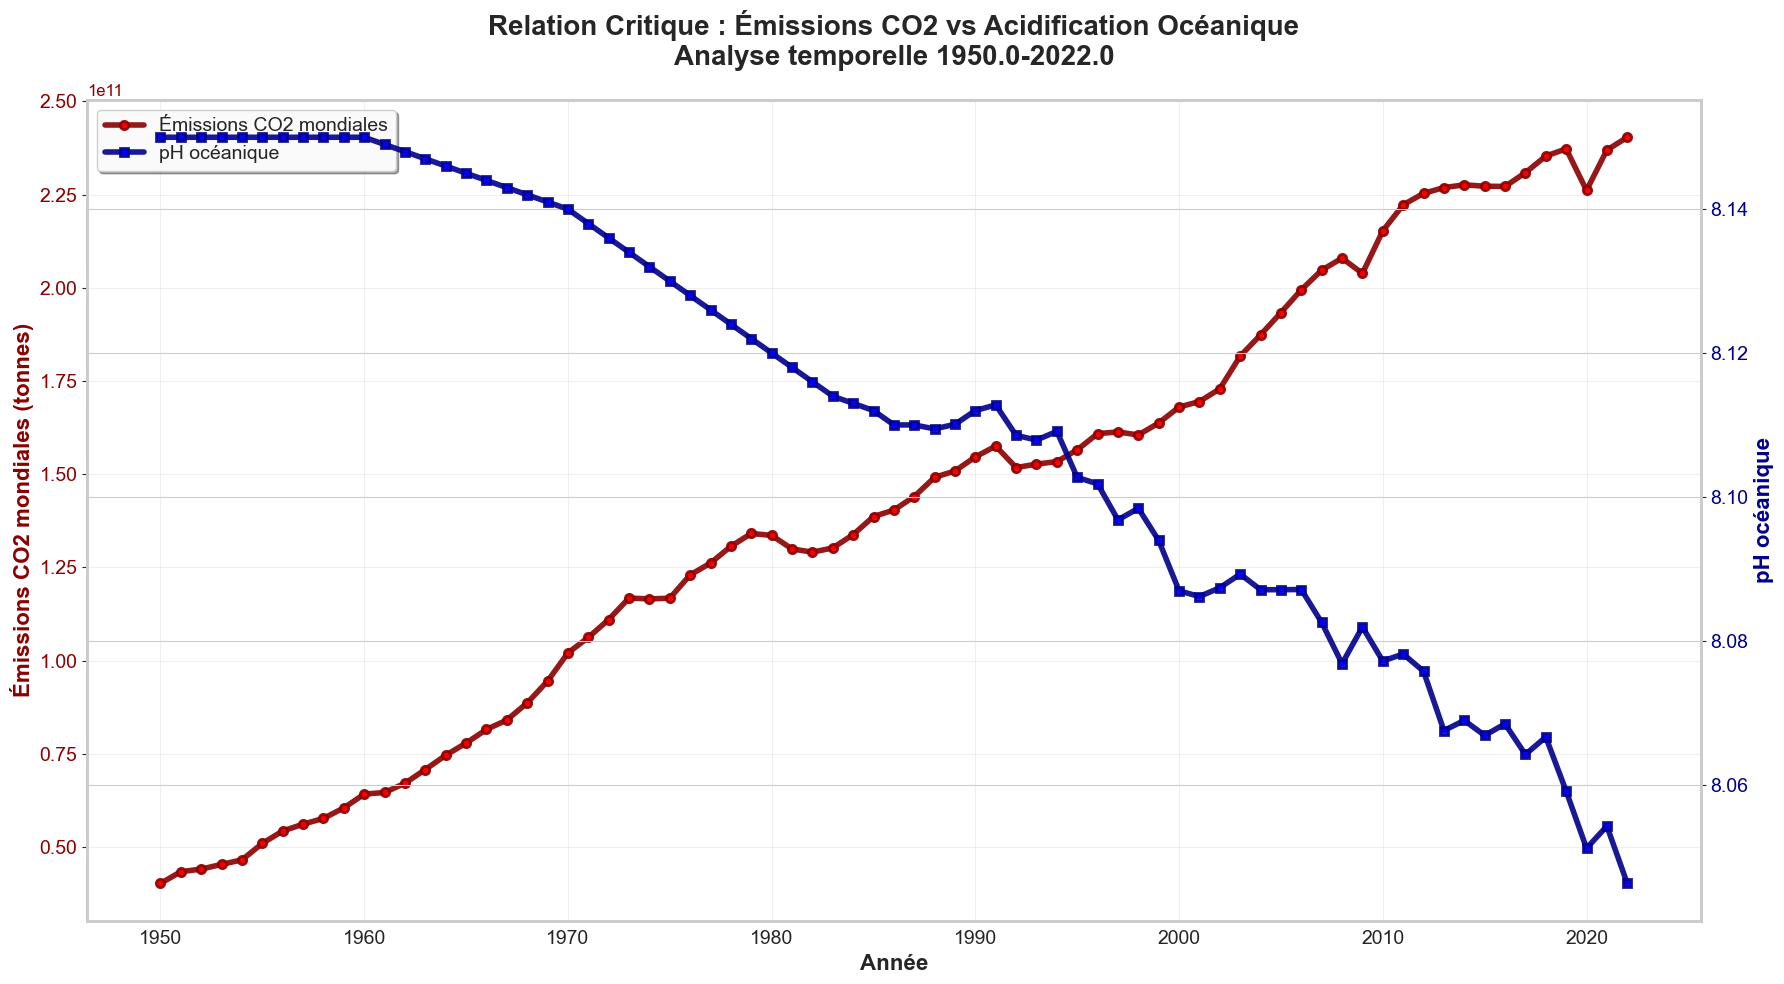


🔬 Corrélation CO2 vs pH océanique: -0.9792
📊 P-value: 6.51e-51


In [14]:

fig, ax1 = plt.subplots(figsize=(18, 10))

# Graphique CO2 (axe gauche)
color1 = 'darkred'
ax1.set_xlabel('Année', fontsize=16, fontweight='bold')
ax1.set_ylabel('Émissions CO2 mondiales (tonnes)', color=color1, fontsize=16, fontweight='bold')
line1 = ax1.plot(merged_co2_acid['year'], merged_co2_acid['emissions_total'],
                 color=color1, linewidth=4, marker='o', markersize=6,
                 markerfacecolor='red', markeredgecolor='darkred', markeredgewidth=2,
                 label='Émissions CO2 mondiales', alpha=0.9)
ax1.tick_params(axis='y', labelcolor=color1, labelsize=14)
ax1.grid(True, alpha=0.3)

# Graphique pH (axe droit)
ax2 = ax1.twinx()
color2 = 'darkblue'
ax2.set_ylabel('pH océanique', color=color2, fontsize=16, fontweight='bold')
line2 = ax2.plot(merged_co2_acid['year'], merged_co2_acid['Ocean_acidification(in_PH)'],
                 color=color2, linewidth=4, marker='s', markersize=6,
                 markerfacecolor='blue', markeredgecolor='darkblue', markeredgewidth=2,
                 label='pH océanique', alpha=0.9)
ax2.tick_params(axis='y', labelcolor=color2, labelsize=14)

# Configuration du titre et des légendes
plt.title('Relation Critique : Émissions CO2 vs Acidification Océanique\n' +
          f'Analyse temporelle {merged_co2_acid["year"].min()}-{merged_co2_acid["year"].max()}',
          fontsize=20, fontweight='bold', pad=25)

# Légende combinée
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left',
          fontsize=14, framealpha=0.95, fancybox=True, shadow=True)

# Style amélioré
ax1.tick_params(axis='x', labelsize=14)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
for spine in ax2.spines.values():
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()

# Calcul de la corrélation
correlation_co2_ph = pearsonr(merged_co2_acid['emissions_total'],
                              merged_co2_acid['Ocean_acidification(in_PH)'])
print(f"\nCorrélation CO2 vs pH océanique: {correlation_co2_ph[0]:.4f}")
print(f"P-value: {correlation_co2_ph[1]:.2e}")


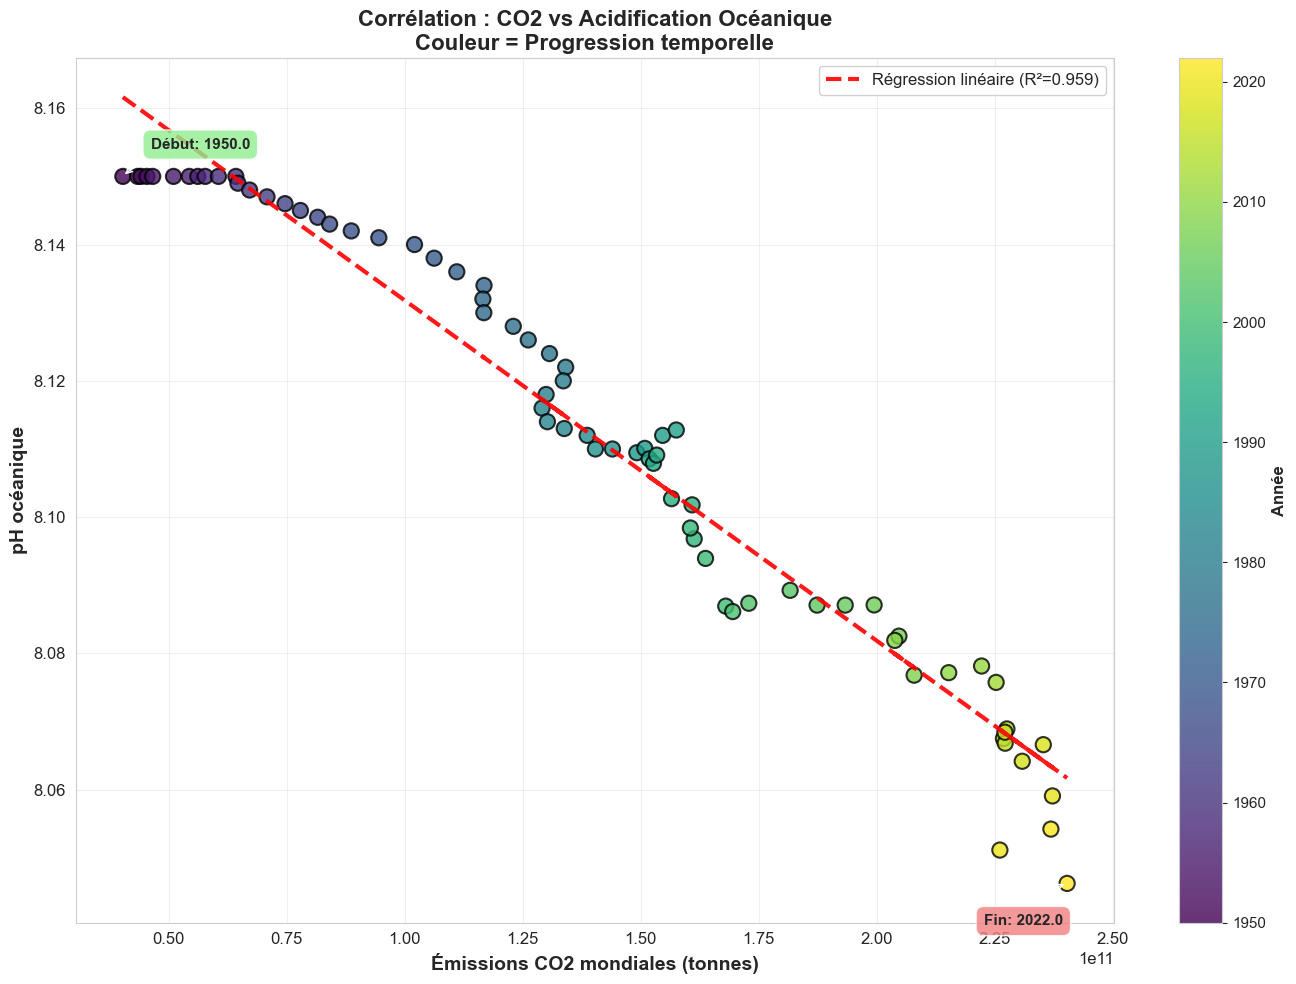

In [10]:

fig, ax = plt.subplots(figsize=(14, 10))

# Scatter plot principal
scatter = ax.scatter(merged_co2_acid['emissions_total'],
                    merged_co2_acid['Ocean_acidification(in_PH)'],
                    s=120, alpha=0.8, c=merged_co2_acid['year'],
                    cmap='viridis', edgecolors='black', linewidth=1.5)

# Ligne de régression
z = np.polyfit(merged_co2_acid['emissions_total'],
               merged_co2_acid['Ocean_acidification(in_PH)'], 1)
p = np.poly1d(z)
ax.plot(merged_co2_acid['emissions_total'],
        p(merged_co2_acid['emissions_total']),
        "r--", alpha=0.9, linewidth=3,
        label=f'Régression linéaire (R²={correlation_co2_ph[0]**2:.3f})')

# Configuration
ax.set_xlabel('Émissions CO2 mondiales (tonnes)', fontsize=14, fontweight='bold')
ax.set_ylabel('pH océanique', fontsize=14, fontweight='bold')
ax.set_title('Corrélation : CO2 vs Acidification Océanique\n' +
            'Couleur = Progression temporelle',
            fontsize=16, fontweight='bold')

# Barre de couleur pour les années
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Année', fontsize=12, fontweight='bold')
cbar.ax.tick_params(labelsize=11)

# Légende et grille
ax.legend(fontsize=12, framealpha=0.9)
ax.grid(True, alpha=0.3)

# Annotations des années extrêmes
min_year_idx = merged_co2_acid['year'].idxmin()
max_year_idx = merged_co2_acid['year'].idxmax()

ax.annotate(f"Début: {merged_co2_acid.loc[min_year_idx, 'year']}",
           xy=(merged_co2_acid.loc[min_year_idx, 'emissions_total'],
               merged_co2_acid.loc[min_year_idx, 'Ocean_acidification(in_PH)']),
           xytext=(20, 20), textcoords='offset points',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8),
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2'),
           fontsize=11, fontweight='bold')

ax.annotate(f"Fin: {merged_co2_acid.loc[max_year_idx, 'year']}",
           xy=(merged_co2_acid.loc[max_year_idx, 'emissions_total'],
               merged_co2_acid.loc[max_year_idx, 'Ocean_acidification(in_PH)']),
           xytext=(-60, -30), textcoords='offset points',
           bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8),
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'),
           fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()
